# DS 3000 - Week 6 Assignment 

**Student Name**: Lauren Foster

**Date**: 6/16/24


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [1]:
import csv
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

## Question 1: 
(5 pts) Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.

In [2]:
# read data and turn into dataframe
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# display dimensions, there are 768 rows and 9 columns
df.shape

(768, 9)

In [4]:
# display summary statistics
df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose, BloodPressue, SkinThickness, and BMI all have a minimum value of 0, but it would be unreasonable for these variables to be 0. I will remove rows with 3 or more 0s in those columns and replace the remaining 0s with the mean value of that column. I also observed that roughly 35% of the women in the dataset have diabetes. 75% of these women have been pregnent at least once. 

## Question 2: 
(5 pts) Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.

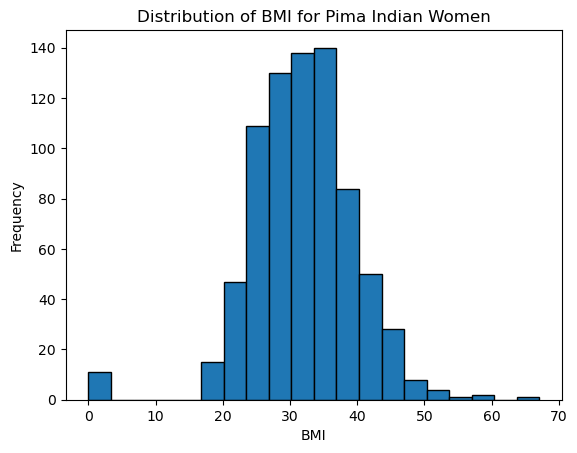

In [5]:
# create a histogram of BMI
plt.hist(df["BMI"], bins = 20, edgecolor = "black") 
plt.title("Distribution of BMI for Pima Indian Women")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

We can see that the most common BMI for women in this data set is between 35 and 38. The distribution is slightly skewed right and the bulk of the data falls between the range of 25 and 40. There are also some outliers where the BMI is between 0 and 5. These outliers are not plausible

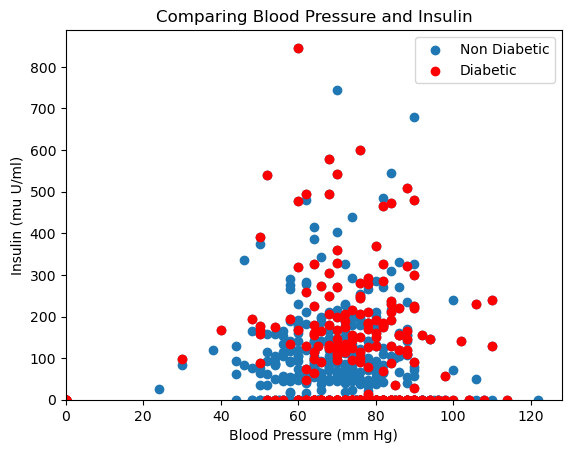

In [6]:
# compare blood pressure and insulin
plt.scatter(df["BloodPressure"], df["Insulin"], label = "Non Diabetic")  
plt.scatter(df[df["Outcome"] == 1]["BloodPressure"], df[df["Outcome"] == 1]["Insulin"], color = "red", label = "Diabetic")
plt.title("Comparing Blood Pressure and Insulin")
plt.xlabel("Blood Pressure (mm Hg)")
plt.ylabel("Insulin (mu U/ml)")
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

We can see that most blood pressure falls between 50 and 90 and that most insulin is concentrated around 200. There does not appear to be a strong correlation between these two variables. There are a few outliers, such as where blood pressure is 0 and where insulin is over 800. There also does not appear to be an obvious correlation betwen diabetes and blood pressure or insulin, as the red dots are scattered around the graph in a seemingly random state.

## Question 3:
(5 pts) Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).

In [7]:
# check for missing data in columns
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null or Nan values in this data set

In [8]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


My response from question 1: Glucose, BloodPressue, SkinThickness, and BMI all have a minimum value of 0, but it would be unreasonable for these variables to be 0. I will remove rows with 3 or more 0s in those columns and replace the remaining 0s with the mean value of that column.

Also from df.describe, I did not find any other indications of invalid data such as negative numbers or extreme outliers.

In [9]:
# remove rows with 3 or more 0s in these columns
zeros_count = (df[["Glucose", "BloodPressure", "SkinThickness", "BMI"]] == 0).sum(axis=1)
df = df[zeros_count < 3]

In [10]:
# replacing the 0s in these columns with the mean (the mean excluding 0 values)
replace = ["Glucose", "BloodPressure", "SkinThickness", "BMI"]
for column in replace:
    mean_value = df[df[column] != 0][column].mean()  
    df[column] = df[column].replace(0, mean_value)  

In [11]:
# making Outcome a categorical variable
df["Outcome"] = df["Outcome"].astype("category")

## Question 4:
(10 pts) Partition the data into train/test sets. After which, perform the following:
encode any categorical data
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [12]:
# partition data
X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]  
y = df["Outcome"]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [13]:
# encode outcome (y) because it is categorical
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [14]:
# normalize numeric features (all features of X are numeric)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Question 5:
(20 pts) Build the model that predicts the target variable. Ensure that you:
Instantiate the correct SVM model, train and evaluate it.
Use GridSearchCV to tune at least two hyperparameters.**
Perform cross validation.
**You'll need to read the documentation of the SVM algorithm to identify the hyperparameters.
Display: 1) the best model/parameters and 2) the best score that was obtained.

In [15]:
# building the grid 
# hyperparameters: C and gamma
params = {"C": np.arange(1, 10),  
          "gamma": np.arange(1, 5)}

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy of svm")
print(accuracy_score(y_test, y_pred))

Accuracy of svm
0.7539267015706806


In [16]:
# perform GridSearchCV
grid = GridSearchCV(svm, params, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': array([1, 2, 3, 4])},
             return_train_score=True)

In [17]:
# display best model parameters and best score
print("Best parameters found:")
print(grid.best_params_)
print("Best score obtained:")
print(grid.best_score_)

Best parameters found:
{'C': 4, 'gamma': 1}
Best score obtained:
0.6982456140350878


## Question 6:
(5 pts) Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model. Did it accurately predict the target? Do you think the prediction from this model is useful and would you advocate for its use in the medical industry?

In [18]:
# training set scores
y_train_pred = grid.best_estimator_.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       200

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570



In [19]:
# test set scores
y_test_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       124
           1       0.56      0.34      0.43        67

    accuracy                           0.68       191
   macro avg       0.63      0.60      0.60       191
weighted avg       0.66      0.68      0.65       191



In [20]:
# print cv results
cv_results = pd.DataFrame(grid.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[["mean_train_score", "std_train_score", "mean_test_score", "std_test_score"]].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
20,1.000000,0.000000,0.698246,0.017189
16,1.000000,0.000000,0.698246,0.017189
12,0.999123,0.001074,0.698246,0.017189
24,1.000000,0.000000,0.696491,0.017189
32,1.000000,0.000000,0.696491,0.017189


The scores for the training data are all 1 or close to 1 indicating the model is very accurate for the training data. However, since the score of the testing data is significantly less than the score of the trainig data, so we know that our model is not very accurate and should not be used in real-life. We can see that there is high variance because the testing data has much lower scores than the training data. There is low bias because the training scores are very high. The recall score of the testing data shows that the model did not accurately catch all patients with diabetes.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
